In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


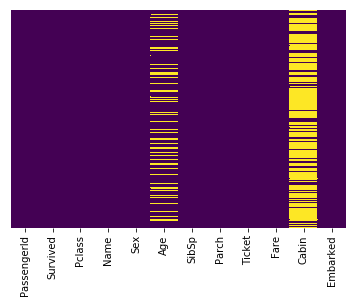

In [4]:
#visualise missing data
sns.heatmap(train.isnull(),yticklabels= False, cbar= False, cmap='viridis')

In [6]:
total= train.isnull().sum().sort_values(ascending= False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
sns.set_style('whitegrid')

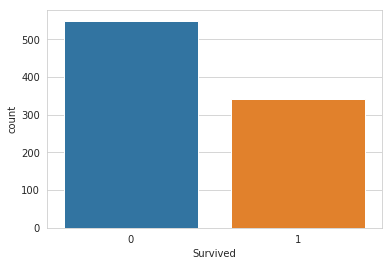

In [9]:
sns.countplot(x="Survived", data=train)

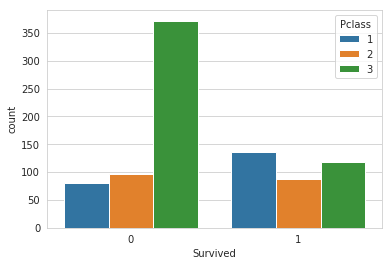

In [12]:
sns.countplot(x="Survived", data=train, hue='Pclass')

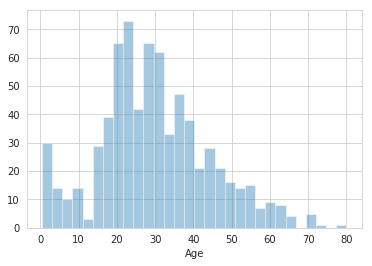

In [15]:
sns.distplot(train['Age'].dropna(), kde= False, bins=30)

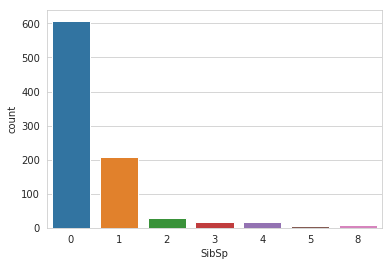

In [16]:
sns.countplot('SibSp',data=train)

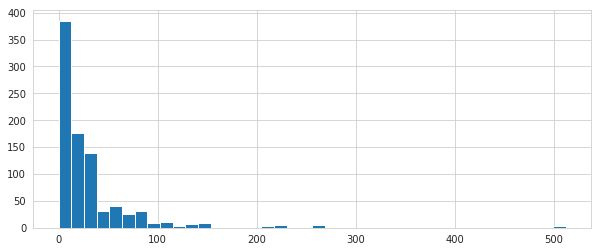

In [18]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [19]:
import cufflinks as cf
cf.go_offline()

In [20]:
train['Fare'].iplot(kind='hist')

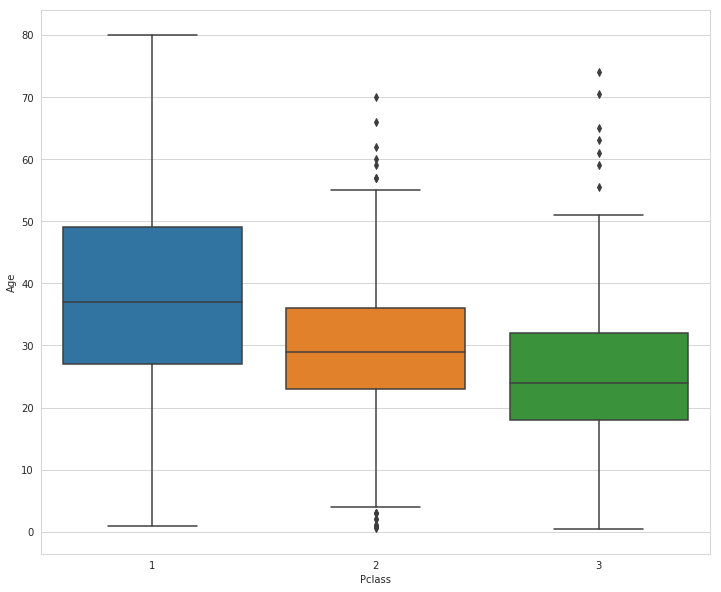

In [24]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Pclass",y="Age", data=train)

In [27]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else: return 24
    else: return Age
    
train['Age'] = train[['Age', "Pclass"]].apply(impute_age, axis=1)
        

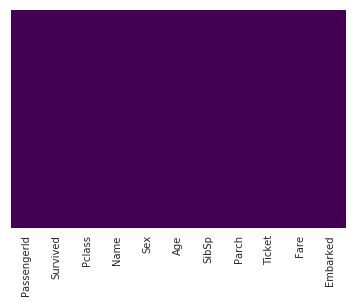

In [31]:
sns.heatmap(train.isnull(),yticklabels= False, cbar= False, cmap='viridis')

In [29]:
train.drop('Cabin', axis=1, inplace= True)

In [30]:
train.dropna(inplace=True)

In [34]:
sex= pd.get_dummies(train['Sex'], drop_first=True)

In [35]:
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [36]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [38]:
pd.concat([train, sex, embark], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


In [39]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [42]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [41]:
train.drop("PassengerId", axis=1, inplace = True)

In [44]:
pclass = pd.get_dummies(train['Pclass'], drop_first= True)
pd.concat([pclass], axis=1)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
5,0,1
6,0,0
7,0,1
8,0,1
9,1,0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [47]:
X = train.drop("Survived", axis=1)
Y = train['Survived']

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train, y_train)

/home/shubhangi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
predictions= logmodel.predict(X_test)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       184
           1       0.71      0.50      0.59       110

   micro avg       0.73      0.73      0.73       294
   macro avg       0.73      0.69      0.70       294
weighted avg       0.73      0.73      0.72       294



In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[161,  23],
       [ 55,  55]])